In [1]:
!python --version
!uname -a
!cat /etc/os-release
!gcc --version

Python 3.10.12
Linux c95b572d138b 6.1.85+ #1 SMP PREEMPT_DYNAMIC Tue Jun 18 14:18:04 UTC 2024 x86_64 x86_64 x86_64 GNU/Linux
PRETTY_NAME="Ubuntu 22.04.3 LTS"
NAME="Ubuntu"
VERSION_ID="22.04"
VERSION="22.04.3 LTS (Jammy Jellyfish)"
VERSION_CODENAME=jammy
ID=ubuntu
ID_LIKE=debian
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
UBUNTU_CODENAME=jammy
gcc (Ubuntu 11.4.0-1ubuntu1~22.04) 11.4.0
Copyright (C) 2021 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [2]:
!sudo apt install python3.8
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.8 1
!sudo apt install libtbb2
!sudo apt install libssl-dev

!python --version

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpython3.8-minimal libpython3.8-stdlib mailcap mime-support
  python3.8-minimal
Suggested packages:
  python3.8-venv binfmt-support
The following NEW packages will be installed:
  libpython3.8-minimal libpython3.8-stdlib mailcap mime-support python3.8
  python3.8-minimal
0 upgraded, 6 newly installed, 0 to remove and 45 not upgraded.
Need to get 5,103 kB of archives.
After this operation, 18.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 mailcap all 3.70+nmu1ubuntu1 [23.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 mime-support all 3.66 [3,696 B]
Get:3 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.8-minimal amd64 3.8.19-1+jammy1 [794 kB]
Get:4 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.8-minima

In [3]:
!mkdir -p APPS
!pwd
!cd APPS && wget https://root.cern/download/root_v6.26.14.Linux-ubuntu22-x86_64-gcc11.4.tar.gz
!cd APPS && tar -xzf root_v6.26.14.Linux-ubuntu22-x86_64-gcc11.4.tar.gz
!ls APPS/root/bin/thisroot.sh
!source APPS/root/bin/thisroot.sh
!echo $ROOTSYS
!echo $PYTHONPATH

/content
--2024-07-03 01:31:29--  https://root.cern/download/root_v6.26.14.Linux-ubuntu22-x86_64-gcc11.4.tar.gz
Resolving root.cern (root.cern)... 188.184.49.144, 2001:1458:d00:55::100:c
Connecting to root.cern (root.cern)|188.184.49.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 281400959 (268M) [application/x-gzip]
Saving to: ‘root_v6.26.14.Linux-ubuntu22-x86_64-gcc11.4.tar.gz’

root_v6.26.14.Linux 100%[===================>] 268.36M  32.2MB/s    in 9.3s    

2024-07-03 01:31:39 (28.9 MB/s) - ‘root_v6.26.14.Linux-ubuntu22-x86_64-gcc11.4.tar.gz’ saved [281400959/281400959]

APPS/root/bin/thisroot.sh

/env/python


In [4]:
import sys
import ctypes

sys.path.append("/content/APPS/root/lib")

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libCore.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libThread.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libImt.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libRIO.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libNet.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libTree.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMathCore.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMatrix.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libHist.so')
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf.so')

<CDLL '/content/APPS/root/lib/libGraf.so', handle 5d1398642700 at 0x7c9ce9fad600>

In [5]:
import requests
import ROOT
import os

Welcome to JupyROOT 6.26/14


In [6]:
def download_file(url, local_filename):
    response = requests.get(url)
    with open(local_filename, 'wb') as f:
        f.write(response.content)
    print(f"Downloaded {local_filename}")

In [7]:
def setstyle():
    ROOT.gROOT.SetStyle("Plain")
    ROOT.gStyle.SetTitleAlign(23)
    ROOT.gStyle.SetTitleX(0.54)
    ROOT.gStyle.SetTitleY(0.97)
    ROOT.gStyle.SetTitleBorderSize(0)
    ROOT.gStyle.SetTitleFillColor(0)
    ROOT.gStyle.SetTitleColor(1)
    ROOT.gStyle.SetLabelFont(132, "xyz")
    ROOT.gStyle.SetTitleFont(132, "xyz")
    ROOT.gStyle.SetTitleFont(132, "")
    ROOT.gStyle.SetTextFont(132)
    ROOT.gStyle.SetStatFont(132)
    ROOT.gStyle.SetOptStat(0)
    ROOT.gStyle.SetNdivisions(510, "xyz")
    ROOT.gStyle.SetNdivisions(505, "z")
    ROOT.gStyle.SetLabelSize(0.075, "xyz")
    ROOT.gStyle.SetTitleSize(0.075, "xyz")
    ROOT.gStyle.SetTitleSize(0.075, "")
    ROOT.gStyle.SetPadTopMargin(0.15)
    ROOT.gStyle.SetPadRightMargin(0.10)
    ROOT.gStyle.SetPadLeftMargin(0.15)
    ROOT.gStyle.SetPadBottomMargin(0.18)
    ROOT.gStyle.SetOptLogz(0)

def plot_first2plus():
    setstyle()
    c1 = ROOT.TCanvas("c1", "c1", 500, 400)
    h = ROOT.TH2D("h", "2^{+}_{1} energies (MeV)", 81, -1., 161., 56, -1., 111.)

    with open("first2plus.dat") as f:
        for line in f:
            z, n, e = map(float, line.split())
            h.Fill(n, z, e / 1000.0)

    h.SetMaximum(4)
    h.GetXaxis().SetTitle("Neutron number #it{N}")
    h.GetYaxis().SetTitle("Proton number #it{Z}")
    h.GetXaxis().CenterTitle()
    h.GetYaxis().CenterTitle()
    h.Draw("colz")

    Tl = ROOT.TLatex()
    Tl.SetTextAlign(12)
    Tl.SetNDC()
    Tl.SetTextSize(0.075)
    Tl.DrawLatex(0.20, 0.80, "#it{Z}: even")
    Tl.DrawLatex(0.20, 0.73, "#it{N}: even")

    return h, c1

Downloaded first2plus.dat


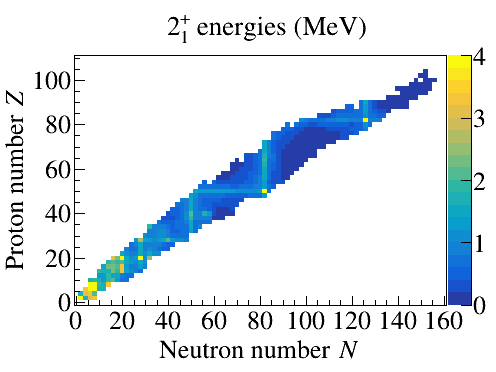

In [8]:
url_dat = "https://www.rcnp.osaka-u.ac.jp/~kobayash/be_koba/cgi-bin/moin.cgi/first2plus.dat"
local_filename_dat = "first2plus.dat"
download_file(url_dat, local_filename_dat)

h,c  = plot_first2plus()
c.Draw()
h.Draw("colz")